# Plotting Xenon wavefunctions
Using the RHF wavefunctions from Bunge et al., used to cross check with Chris' notes.

In [1]:
import sys
sys.path.append('../erec')
from numpy import *
from Params import *
from PlotFuncs import *
from AtomicFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean

fig,ax1,ax2,ax3 = MyTriplePlot('',r'$r^2 R_{nl}(r)$','$r$ [keV$^{-1}$]','','','',wspace=0.0,tfs=30)

# s-shell
n_s = array([1]+[2]*2+[3]*3+[4]*3+[5]*4)
Z_s = array([54.9179,47.2500,26.0942,68.1771,16.8296,12.0759,31.9030,8.0145,5.8396,14.7123,3.8555,2.6343,1.8124])
c_1s = array([-0.965401,-0.040350,0.001890,-0.003868,-0.000263,0.000547,-0.000791,0.000014,-0.000013,-0.000286,0.000005,-0.000003,0.000001])
c_2s = array([0.313912,0.236118,-0.985333,0.000229,-0.346825,0.345786,-0.120941,-0.005057,0.001528,-0.151508,-0.000281,0.000134,-0.000040])
c_3s = array([-0.140382,-0.125401,0.528161,-0.000435,0.494492,-1.855445,0.128637,-0.017980,0.000792,0.333907,-0.000228,0.000191,-0.000037])
c_4s = array([0.064020,0.059550,-0.251138,0.000152,-0.252274,1.063559,-0.071737,-0.563072,-0.697466,-0.058009,-0.018353,0.002292,-0.000834])
c_5s = array([-0.022510,-0.021077,0.088978,-0.000081,0.095199,-0.398492,0.025623,0.274471,0.291110,0.011171,-0.463123,-0.545266,-0.167779])

# p-shell
n_p = array([2]*2+[3]*3+[4]*3+[5]*4)
Z_p = array([58.7712,22.6065,48.9702,13.4997,9.8328,40.2591,7.1841,5.1284,21.5330,3.4469,2.2384,1.14588])
c_2p = array([0.051242,0.781070,0.114910,-0.000731,0.000458,0.083993,-0.000265,0.000034,0.009061,-0.000014,0.000006,-0.000002])
c_3p = array([0.000264,0.622357,-0.009861,-0.952677,-0.337900,-0.026340,-0.000384,-0.001665,0.087491,0.000240,-0.000083,0.000026])
c_4p = array([0.013769,-0.426955,0.045088,0.748434,0.132850,0.059406,-0.679569,-0.503653,-0.149635,-0.014193,0.000528,-0.000221])
c_5p = array([-0.005879,0.149040,-0.018716,-0.266839,-0.031096,-0.024100,0.267374,0.161460,0.059721,-0.428353,-0.542284,-0.201667])

# d-shell
n_d = array([3]*3+[4]*5)
Z_d = array([19.9787,12.2129,8.6994,27.7398,15.9410,6.0580,4.0990,2.5857])
c_4d = array([-0.013758,-0.804573,0.260624,0.00749,0.244109,0.597018,0.395554,0.039786])
c_3d = array([0.220185,0.603140,0.194682,-0.014369,0.049865,-0.000300,0.000418,-0.000133])

r = logspace(-2.0,1.0,500) # keV^-1

ax1.plot(r,(r**2)*(R_nl(r,c_1s,n_s,Z_s)**2.0),'-',lw=3,label='1s')
ax1.plot(r,(r**2)*(R_nl(r,c_2s,n_s,Z_s)**2.0),'-',lw=3,label='2s')
ax1.plot(r,(r**2)*(R_nl(r,c_3s,n_s,Z_s)**2.0),'-',lw=3,label='3s')
ax1.plot(r,(r**2)*(R_nl(r,c_4s,n_s,Z_s)**2.0),'-',lw=3,label='4s')
ax1.plot(r,(r**2)*(R_nl(r,c_5s,n_s,Z_s)**2.0),'-',lw=3,label='5s')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1e-10,50])
ax1.set_xlim([0.01,50.0])

ax2.plot(r,(r**2)*(R_nl(r,c_2p,n_p,Z_p)**2.0),'-',lw=3,label='2p')
ax2.plot(r,(r**2)*(R_nl(r,c_3p,n_p,Z_p)**2.0),'-',lw=3,label='3p')
ax2.plot(r,(r**2)*(R_nl(r,c_4p,n_p,Z_p)**2.0),'-',lw=3,label='4p')
ax2.plot(r,(r**2)*(R_nl(r,c_5p,n_p,Z_p)**2.0),'-',lw=3,label='5p')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([1e-10,50])
ax2.set_xlim([0.01,50.0])

ax3.plot(r,(r**2)*(R_nl(r,c_4d,n_d,Z_d)**2.0),'-',lw=3,label='3d')
ax3.plot(r,(r**2)*(R_nl(r,c_3d,n_d,Z_d)**2.0),'-',lw=3,label='4d')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylim([1e-10,50])
ax3.set_xlim([0.01,50.0])

ax2.set_yticklabels([])
ax3.set_yticklabels([])

# Show and save
plt.show()
pltname = "Xe_Wavefunctions"
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')



# Check moments match the table in Bunge et al.:
r = logspace(-3.0,1.0,5000) # keV^-1

def r_moment(m,r,c,n,Z):
    rR = (r*R_nl(r,c,n,Z))**2.0
    return trapz((r**m)*rR,r)/(a0**m)

print('')
print('s orbital moments')
for m in [1,2,-1,-2,-3]:
    print('moment of r =',m,'|',r_moment(m,r,c_1s,n_s,Z_s),r_moment(m,r,c_2s,n_s,Z_s),r_moment(m,r,c_3s,n_s,Z_s),r_moment(m,r,c_4s,n_s,Z_s),r_moment(m,r,c_5s,n_s,Z_s))

print('')
print('p orbital moments')
for m in [1,2,-1,-2,-3]:
    print('moment of r =',m,'|',r_moment(m,r,c_2p,n_p,Z_p),r_moment(m,r,c_3p,n_p,Z_p),r_moment(m,r,c_4p,n_p,Z_p),r_moment(m,r,c_5p,n_p,Z_p))

print('')
print('d orbital moments')
for m in [1,2,-1,-2,-3]:
    print('moment of r =',m,'|',r_moment(m,r,c_3d,n_d,Z_d),r_moment(m,r,c_4d,n_d,Z_d))

<Figure size 2000x700 with 3 Axes>


s orbital moments
moment of r = 1 | 0.0281193194397451 0.12087030608915526 0.31869532714195087 0.7452685396234751 1.9809534512140694
moment of r = 2 | 0.0010590964603667482 0.017159522973442573 0.11586964691952208 0.62557220607013 4.440083419439626
moment of r = -1 | 50.17184652613148 11.962939989933394 4.457944760319344 1.8281222748166246 0.6461081606050256
moment of r = -2 | 3840.881720198156 415.1400164754763 85.56917509259705 18.552376032584498 2.4800241434282695
moment of r = -3 | 431837.18312310486 42424.80457711835 8384.545715704631 1739.533550184973 214.9704970060896

p orbital moments
moment of r = 1 | 0.10308207449930532 0.3094257100473763 0.777001527970376 2.2072041636377286
moment of r = 2 | 0.012915100858500284 0.11081631539532728 0.6854933930267422 6.275668932873735
moment of r = -1 | 12.291110079244339 4.444386464807935 1.7414548309684288 0.5102840095770783
moment of r = -2 | 204.20927491925642 41.56684053121504 8.681081233000752 0.9521363710390455
moment of r = -3 | 50

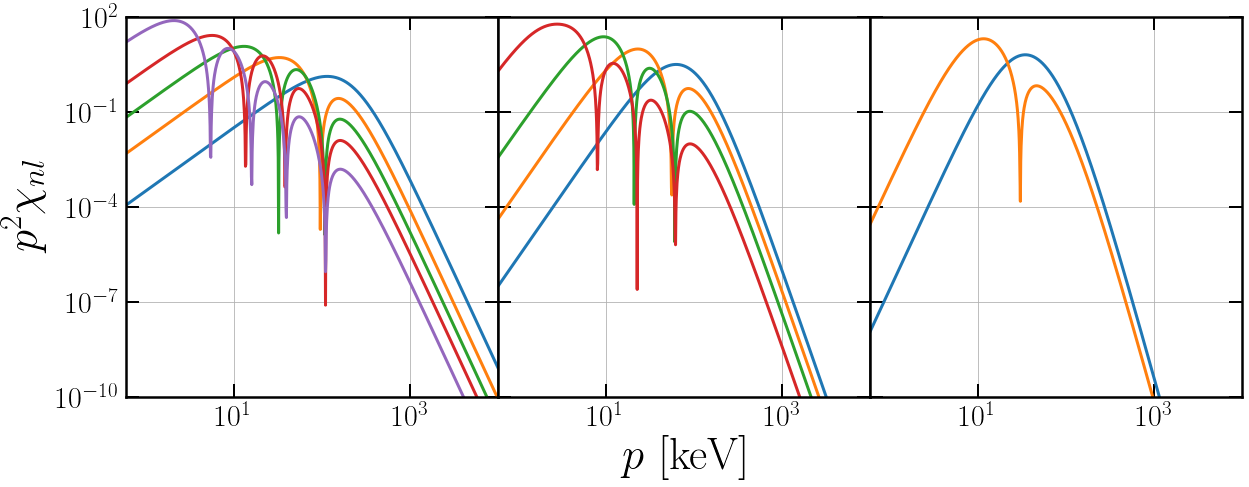

Check normalisation to (2 pi)^3
s:
1.0000145277971468
1.0000111024979188
0.9999594346441988
0.999372442337081
0.9863622413270382

p:
1.000015621845307
1.0000159942124627
0.9999982292696756
0.9233477267774536

d:
1.0000154353481914
1.0000149768841244


In [2]:
from scipy.special import hyp2f1, gamma

fig,ax1,ax2,ax3 = MyTriplePlot('',r'$p^2 \chi_{nl}$','$p$ [keV]','','','',wspace=0.0,tfs=30)

p = logspace(log10(0.6),4.0,1000)

ax1.plot(p,(p**2)*(chi_nl_sq(p,0,c_1s,n_s,Z_s)),'-',lw=3)
ax1.plot(p,(p**2)*(chi_nl_sq(p,0,c_2s,n_s,Z_s)),'-',lw=3)
ax1.plot(p,(p**2)*(chi_nl_sq(p,0,c_3s,n_s,Z_s)),'-',lw=3)
ax1.plot(p,(p**2)*(chi_nl_sq(p,0,c_4s,n_s,Z_s)),'-',lw=3)
ax1.plot(p,(p**2)*(chi_nl_sq(p,0,c_5s,n_s,Z_s)),'-',lw=3)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1e-10,100])
ax1.grid()
ax1.set_xlim([p[0],p[-1]])


ax2.plot(p,(p**2)*(chi_nl_sq(p,1,c_2p,n_p,Z_p)),'-',lw=3)
ax2.plot(p,(p**2)*(chi_nl_sq(p,1,c_3p,n_p,Z_p)),'-',lw=3)
ax2.plot(p,(p**2)*(chi_nl_sq(p,1,c_4p,n_p,Z_p)),'-',lw=3)
ax2.plot(p,(p**2)*(chi_nl_sq(p,1,c_5p,n_p,Z_p)),'-',lw=3)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_yticklabels([])
ax2.set_ylim([1e-10,100])
ax2.grid()
ax2.set_xlim([p[0],p[-1]])


ax3.plot(p,(p**2)*(chi_nl_sq(p,2,c_3d,n_d,Z_d)),'-',lw=3)
ax3.plot(p,(p**2)*(chi_nl_sq(p,2,c_4d,n_d,Z_d)),'-',lw=3)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylim([1e-10,100])
ax3.set_ylim([1e-10,100])
ax3.set_xlim([p[0],p[-1]])
ax3.grid()
ax3.set_yticklabels([])

# Show and save
plt.show()
pltname = "Xe_Wavefunctions_momentumspace"
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')


# check they're normalised
print('Check normalisation to (2 pi)^3')
print('s:')
print(trapz((p**2)*chi_nl_sq(p,0,c_1s,n_s,Z_s),p)/(2*pi)**3.0)
print(trapz((p**2)*chi_nl_sq(p,0,c_2s,n_s,Z_s),p)/(2*pi)**3.0)
print(trapz((p**2)*chi_nl_sq(p,0,c_3s,n_s,Z_s),p)/(2*pi)**3.0)
print(trapz((p**2)*chi_nl_sq(p,0,c_4s,n_s,Z_s),p)/(2*pi)**3.0)
print(trapz((p**2)*chi_nl_sq(p,0,c_5s,n_s,Z_s),p)/(2*pi)**3.0)

print('')
print('p:')
print(trapz((p**2)*chi_nl_sq(p,1,c_2p,n_p,Z_p),p)/(2*pi)**3.0)
print(trapz((p**2)*chi_nl_sq(p,1,c_3p,n_p,Z_p),p)/(2*pi)**3.0)
print(trapz((p**2)*chi_nl_sq(p,1,c_4p,n_p,Z_p),p)/(2*pi)**3.0)
print(trapz((p**2)*chi_nl_sq(p,1,c_5p,n_p,Z_p),p)/(2*pi)**3.0)

print('')
print('d:')
print(trapz((p**2)*chi_nl_sq(p,2,c_3d,n_d,Z_d),p)/(2*pi)**3.0)
print(trapz((p**2)*chi_nl_sq(p,2,c_4d,n_d,Z_d),p)/(2*pi)**3.0)



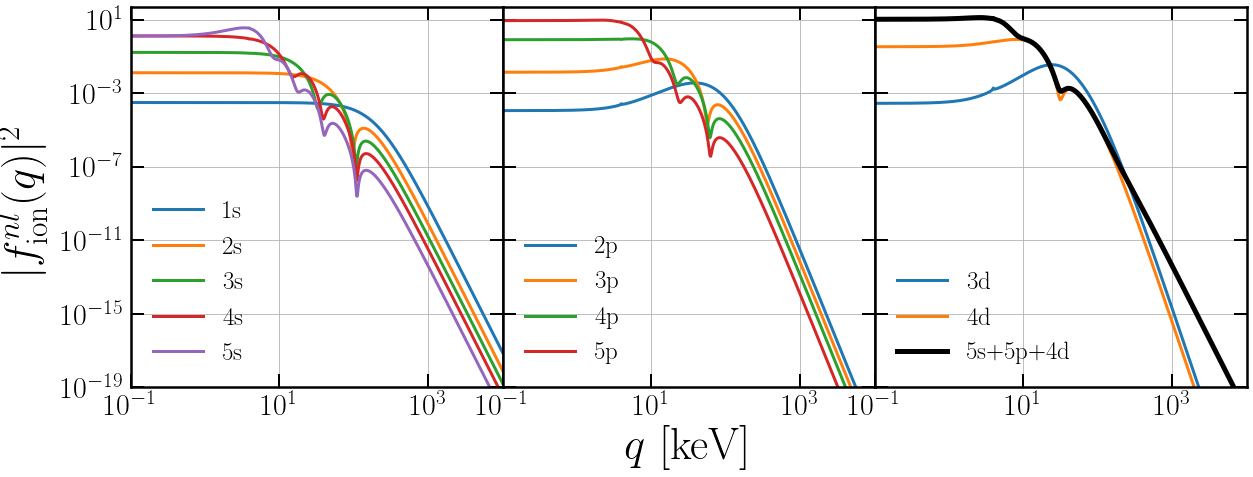

In [5]:
fig,ax1,ax2,ax3 = MyTriplePlot('',r'$|f^{nl}_{\rm ion}(q)|^2$','$q$ [keV]','','','',wspace=0.0,tfs=30)

E_r = 15*1.0e-3
q = logspace(-1.0,4.0,600)

ax1.plot(q,f_nl_ion_sq(q,E_r,0,c_1s,n_s,Z_s),'-',lw=3,label='1s')
ax1.plot(q,f_nl_ion_sq(q,E_r,0,c_2s,n_s,Z_s),'-',lw=3,label='2s')
ax1.plot(q,f_nl_ion_sq(q,E_r,0,c_3s,n_s,Z_s),'-',lw=3,label='3s')
ax1.plot(q,f_nl_ion_sq(q,E_r,0,c_4s,n_s,Z_s),'-',lw=3,label='4s')
ax1.plot(q,f_nl_ion_sq(q,E_r,0,c_5s,n_s,Z_s),'-',lw=3,label='5s')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim([1e-19,50])
ax1.grid()
ax1.set_xlim([q[0],q[-1]])


ax2.plot(q,f_nl_ion_sq(q,E_r,1,c_2p,n_p,Z_p),'-',lw=3,label='2p')
ax2.plot(q,f_nl_ion_sq(q,E_r,1,c_3p,n_p,Z_p),'-',lw=3,label='3p')
ax2.plot(q,f_nl_ion_sq(q,E_r,1,c_4p,n_p,Z_p),'-',lw=3,label='4p')
ax2.plot(q,f_nl_ion_sq(q,E_r,1,c_5p,n_p,Z_p),'-',lw=3,label='5p')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim([1e-19,50])
ax2.grid()
ax2.set_xlim([q[0],q[-1]])
ax2.set_yticklabels([])



ax3.plot(q,f_nl_ion_sq(q,E_r,2,c_3d,n_d,Z_d),'-',lw=3,label='3d')
ax3.plot(q,f_nl_ion_sq(q,E_r,2,c_4d,n_d,Z_d),'-',lw=3,label='4d')
ftot_Xe = f_nl_ion_sq(q,E_r,1,c_5p,n_p,Z_p)+f_nl_ion_sq(q,E_r,2,c_4d,n_d,Z_d)+f_nl_ion_sq(q,E_r,0,c_5s,n_s,Z_s)
ax3.plot(q,ftot_Xe,'k-',lw=5,label='5s+5p+4d')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylim([1e-19,50])
ax3.grid()
ax3.set_xlim([q[0],q[-1]])
ax3.set_yticklabels([])

ax1.legend(frameon=False,fontsize=25)
ax2.legend(frameon=False,fontsize=25)
ax3.legend(frameon=False,fontsize=25)

# Show and save
plt.show()
pltname = "Xe_IonisationFormFactors"
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [130]:
# Saving xenon coefficients as csv files

import pandas as pd

kmax = size(n_s)
orbs = ['s']*kmax
ks = list(arange(1,kmax+1))
nrows = size(orbs)
d = {'Atom': ['Xe']*nrows, 'Orbital':orbs,'l':[0]*nrows,'k':ks,'n_lk':n_s,'Z_lk':Z_s,'c_1s':c_1s,'c_2s':c_2s,'c_3s':c_3s,'c_4s':c_4s,'c_5s':c_5s}
df_s = pd.DataFrame(data=d)

kmax = size(n_p)
orbs = ['p']*size(n_p)
kp = list(arange(1,kmax+1))
nrows = size(orbs)
d = {'Atom': ['Xe']*nrows, 'Orbital':orbs,'l':[1]*nrows,'k':kp,'n_lk':n_p,'Z_lk':Z_p,'c_2p':c_2p,'c_3p':c_3p,'c_4p':c_4p,'c_5p':c_5p}
df_p = pd.DataFrame(data=d)
df_p

kmax = size(n_d)
orbs = ['d']*kmax
kd = list(arange(1,kmax+1))
nrows = size(orbs)
d = {'Atom': ['Xe']*nrows, 'Orbital':orbs,'l':[1]*nrows,'k':kd,'n_lk':n_d,'Z_lk':Z_d,'c_3d':c_3d,'c_4d':c_4d}
df_d = pd.DataFrame(data=d)
df_d

,Atom,Shell,l,k,n_lk,Z_lk,c_3d,c_4d
0,Xe,d,1,1,3,19.9787,0.220185,-0.013758
1,Xe,d,1,2,3,12.2129,0.603140,-0.804573
2,Xe,d,1,3,3,8.6994,0.194682,0.260624
3,Xe,d,1,4,4,27.7398,-0.014369,0.007490
4,Xe,d,1,5,4,15.9410,0.049865,0.244109
5,Xe,d,1,6,4,6.0580,-0.000300,0.597018
6,Xe,d,1,7,4,4.0990,0.000418,0.395554
7,Xe,d,1,8,4,2.5857,-0.000133,0.039786


In [132]:
df_s.to_csv('Xe_s.csv',index=False)
df_p.to_csv('Xe_p.csv',index=False)
df_d.to_csv('Xe_d.csv',index=False)


In [133]:
df_p

,Atom,Shell,l,k,n_lk,Z_lk,c_2p,c_3p,c_4p,c_5p
0,Xe,p,1,1,2,58.77120,0.051242,0.000264,0.013769,-0.005879
1,Xe,p,1,2,2,22.60650,0.781070,0.622357,-0.426955,0.149040
2,Xe,p,1,3,3,48.97020,0.114910,-0.009861,0.045088,-0.018716
3,Xe,p,1,4,3,13.49970,-0.000731,-0.952677,0.748434,-0.266839
4,Xe,p,1,5,3,9.83280,0.000458,-0.337900,0.132850,-0.031096
5,Xe,p,1,6,4,40.25910,0.083993,-0.026340,0.059406,-0.024100
6,Xe,p,1,7,4,7.18410,-0.000265,-0.000384,-0.679569,0.267374
7,Xe,p,1,8,4,5.12840,0.000034,-0.001665,-0.503653,0.161460
8,Xe,p,1,9,5,21.53300,0.009061,0.087491,-0.149635,0.059721
9,Xe,p,1,10,5,3.44690,-0.000014,0.000240,-0.014193,-0.428353


In [134]:
df_d

,Atom,Shell,l,k,n_lk,Z_lk,c_3d,c_4d
0,Xe,d,1,1,3,19.9787,0.220185,-0.013758
1,Xe,d,1,2,3,12.2129,0.603140,-0.804573
2,Xe,d,1,3,3,8.6994,0.194682,0.260624
3,Xe,d,1,4,4,27.7398,-0.014369,0.007490
4,Xe,d,1,5,4,15.9410,0.049865,0.244109
5,Xe,d,1,6,4,6.0580,-0.000300,0.597018
6,Xe,d,1,7,4,4.0990,0.000418,0.395554
7,Xe,d,1,8,4,2.5857,-0.000133,0.039786


In [135]:
df_s

,Atom,Shell,l,k,n_lk,Z_lk,c_1s,c_2s,c_3s,c_4s,c_5s
0,Xe,s,0,1,1,54.9179,-0.965401,0.313912,-0.140382,0.064020,-0.022510
1,Xe,s,0,2,2,47.2500,-0.040350,0.236118,-0.125401,0.059550,-0.021077
2,Xe,s,0,3,2,26.0942,0.001890,-0.985333,0.528161,-0.251138,0.088978
3,Xe,s,0,4,3,68.1771,-0.003868,0.000229,-0.000435,0.000152,-0.000081
4,Xe,s,0,5,3,16.8296,-0.000263,-0.346825,0.494492,-0.252274,0.095199
5,Xe,s,0,6,3,12.0759,0.000547,0.345786,-1.855445,1.063559,-0.398492
6,Xe,s,0,7,4,31.9030,-0.000791,-0.120941,0.128637,-0.071737,0.025623
7,Xe,s,0,8,4,8.0145,0.000014,-0.005057,-0.017980,-0.563072,0.274471
8,Xe,s,0,9,4,5.8396,-0.000013,0.001528,0.000792,-0.697466,0.291110
9,Xe,s,0,10,5,14.7123,-0.000286,-0.151508,0.333907,-0.058009,0.011171
